<a href="https://colab.research.google.com/github/Sheethaljoshi/breastcan/blob/main/breast_cancer_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

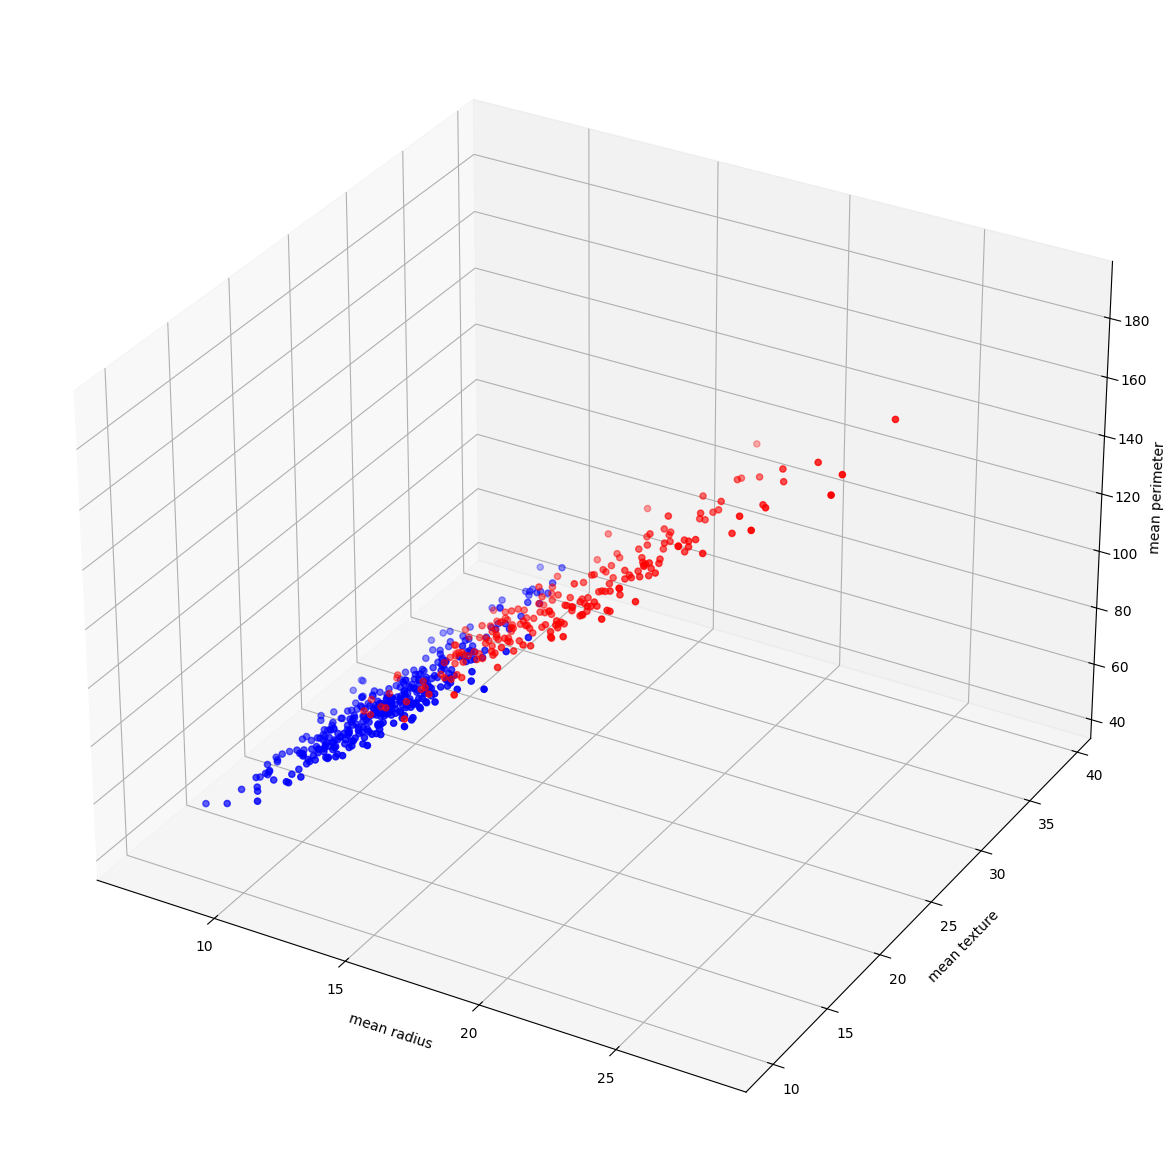

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer

X= []
for target in range(2):
  X.append([[],[],[]])
  for i in range(len(cancer.data)):
    if cancer.target[i] == target:
      X[target][0].append(cancer.data[i][0])
      X[target][1].append(cancer.data[i][1])
      X[target][2].append(cancer.data[i][2])
colours = ("r", "b")
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection = '3d')
for target in range(2):
  ax.scatter(X[target][0],X[target][1],X[target][2],c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

<ipython-input-12-b5dd7b9316a6>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,


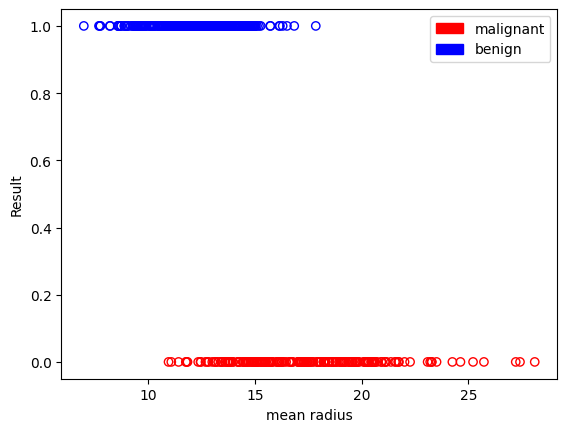

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = cancer.data[:,0]
y=cancer.target
colors = {0: 'red', 1: 'blue'}
plt.scatter(x,y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

red   = mpatches.Patch(color='red',   label='malignant')
blue  = mpatches.Patch(color='blue',  label='benign')

plt.legend(handles=[red, blue], loc=1)


In [ ]:
from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

print(log_regress.intercept_)

print(log_regress.coef_)

[15.12718591]
[[-1.02519623]]


<ipython-input-15-4cfb15c5934f>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,


Text(0, 0.5, 'Probability')

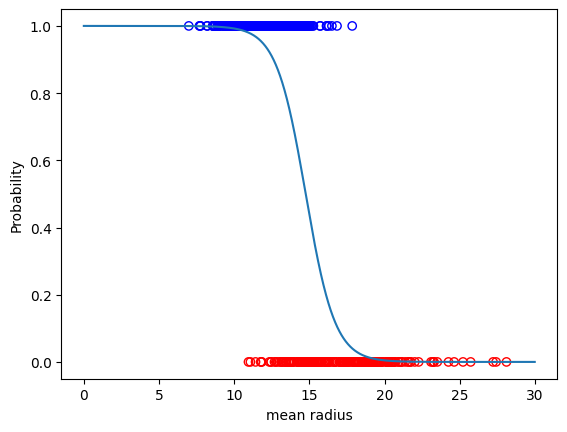

In [ ]:
def sigmoid(x):
      return (1 / (1 +
          np.exp(-(log_regress.intercept_[0] +
          (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)

In [ ]:
from sklearn import linear_model
x = train_set[:,0:30]         # mean radius
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import pandas as pd

preds_prob= pd.DataFrame(log_regress.predict_log_proba(X=test_set))

preds_prob.columns = ['malignant', 'benign']

preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

result = pd.concat([preds_prob, preds_class, original_result], axis=1)

print(result.head())

      malignant     benign  Prediction  Original Result
0 -1.648840e-04  -8.710351           0                0
1 -2.509308e-04  -8.290459           0                0
2 -1.757242e+00  -0.189370           1                1
3 -5.695134e-09 -18.983654           0                0
4 -2.409885e+00  -0.094119           1                0


In [ ]:
print(pd.crosstab(preds, test_labels))

col_0   0   1
row_0        
0      48   4
1       5  86


In [ ]:
print(log_regress.score(X= test_set, y= test_labels))


0.9370629370629371


In [ ]:
from sklearn import metrics
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

